Filtern

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = 'C:/Users/oache/OneDrive - Hochschule München/Codeing/KI_ML/vehicles.csv/vehicles.csv'
#url= 'C:/Users/nicof/OneDrive/Dokumente/FH-München/KI\Modularbeit/archive/vehicles.csv'
df = pd.read_csv(url)
  
  
df_s1 = df
df_s1 = df_s1.drop(['id','VIN','url','region_url','size','image_url','description','county','lat','long'],axis=1)
  

df_s1 = df_s1.dropna(subset=['manufacturer', 'price','model','year'])
df_s1.head(5)




,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,2021-05-03T14:02:03-0500


df.column_1.apply(lambda x: x.split(' / ')[0])

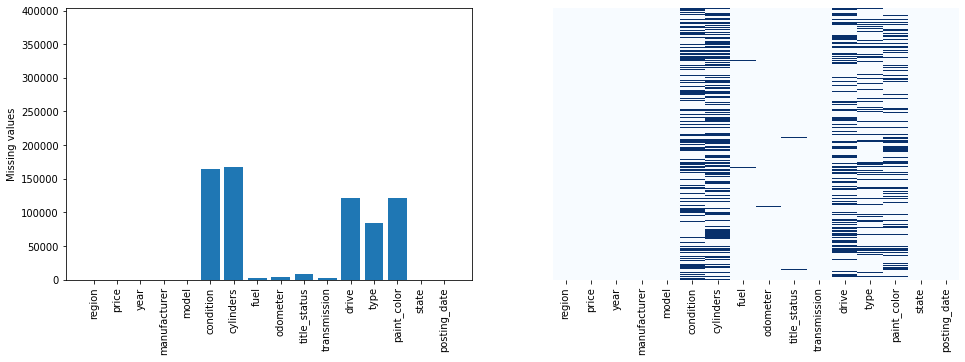

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Fehlende Daten veranschaulichen
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.bar(df_s1.columns,df_s1.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df_s1.shape[0])
ax1.tick_params('x',labelrotation=90)

sns.heatmap(df_s1.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()




In [ ]:
#Lösche Zeilen mit mehr als 9 fehlenden Einträgen
df_s1.dropna(subset=['year','manufacturer','model', 'condition', 'cylinders', 'fuel','odometer','title_status','transmission', 
                    'drive', 'type', 'paint_color', 'state', 'posting_date'], axis=0, thresh=9, inplace=True)
df_s1.shape


(403289, 16)

C:\Users\nicof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


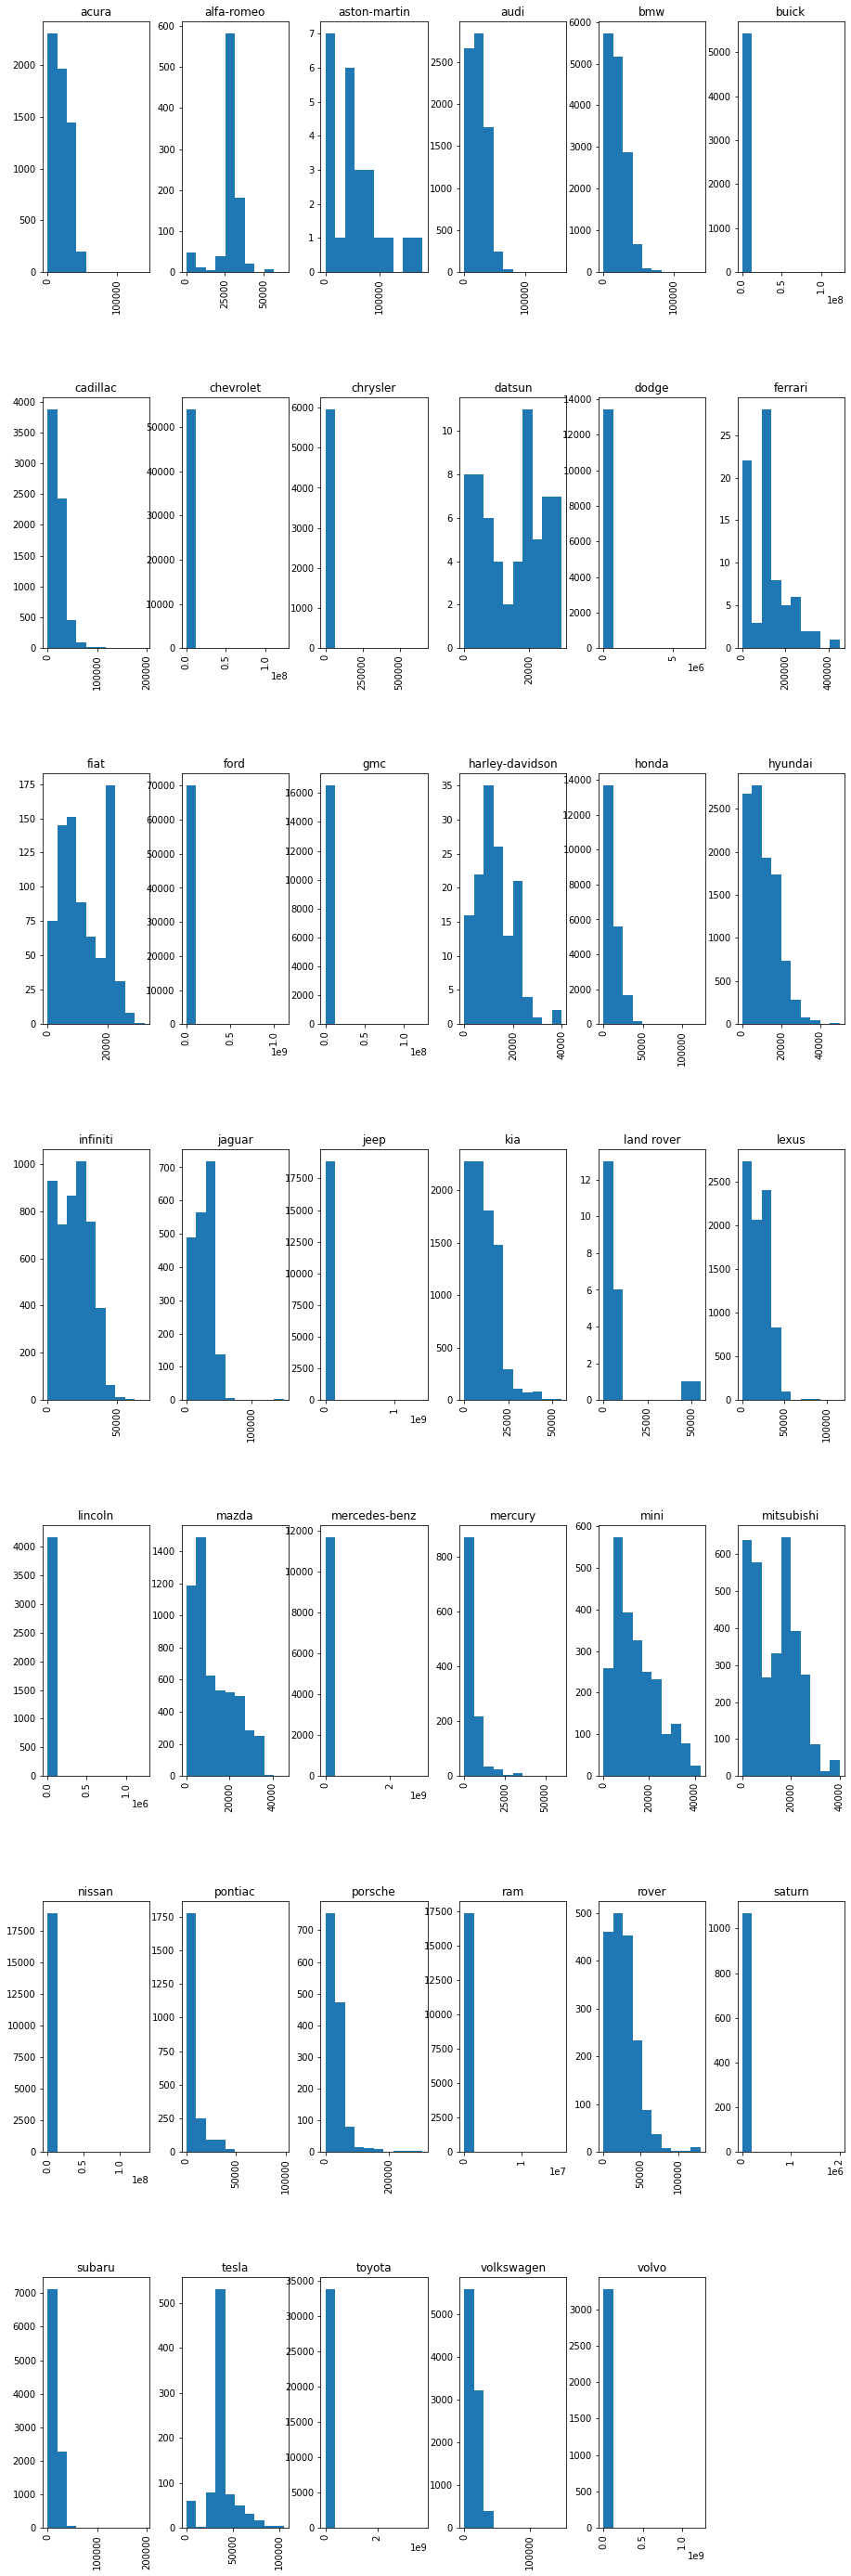

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,50))
df_s1.hist('price','manufacturer',ax=ax,grid=1)
plt.xlabel('Count')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
ausreißer=df_s1.loc[(df.price > 150_000_000) ]
ausreißer



,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,rwd,pickup,white,ca,2021-04-11T11:40:08-0700
91576,delaware,3024942282,2000.0,mercedes-benz,benz e320,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,de,2021-04-20T08:46:47-0400
153082,indianapolis,1234567890,2006.0,volvo,vnl,fair,NaN,other,200000.0,clean,manual,NaN,NaN,black,in,2021-04-11T11:19:14-0400
184704,frederick,1410065407,1989.0,jeep,wrangler,NaN,NaN,diesel,103000.0,clean,manual,NaN,SUV,NaN,md,2021-04-09T16:02:34-0400
257840,south jersey,3024942282,2000.0,mercedes-benz,benz s430,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,nj,2021-04-20T08:59:55-0400
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,automatic,4wd,pickup,silver,or,2021-04-16T18:16:12-0700
356716,knoxville,3736928711,1999.0,toyota,4runner,fair,6 cylinders,gas,211000.0,clean,automatic,4wd,NaN,green,tn,2021-04-05T23:15:48-0400


In [ ]:
#Marken wo sehr teure Autos untypisch sind
#ausreißer_Toyota=df_s1[(df.price > 150_000_000) & (df_s1.manufacturer.str.contains ('toyota'))  ]
#ausreißer_Toyota
#ausreißer_Ford=df_s1[(df.price > 150_000_000) & (df_s1.manufacturer.str.contains ('ford'))  ]
#ausreißer_Ford
#ausreißer_Jeep=df_s1[(df.price > 150_000_000) & (df_s1.manufacturer.str.contains ('jeep'))  ]
#ausreißer_Jeep



In [ ]:
#Angebote wo der Preis untypisch zu hoch für die Marken sind rausfiltern
indexNames = df_s1[(df_s1['price'] >= 150000)
                & 
                ( (df_s1['manufacturer'] !='porsche')
                | (df_s1['manufacturer'] !='jaguar')
                | (df_s1['manufacturer'] !='mercedes')
                | (df_s1['manufacturer'] !='rover')
                | (df_s1['manufacturer'] !='tesla')
                | (df_s1['manufacturer'] !='aston-martin')
                | (df_s1['manufacturer'] !='ferrari')) ].index
df_s1.drop(indexNames , inplace=True)

C:\Users\nicof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


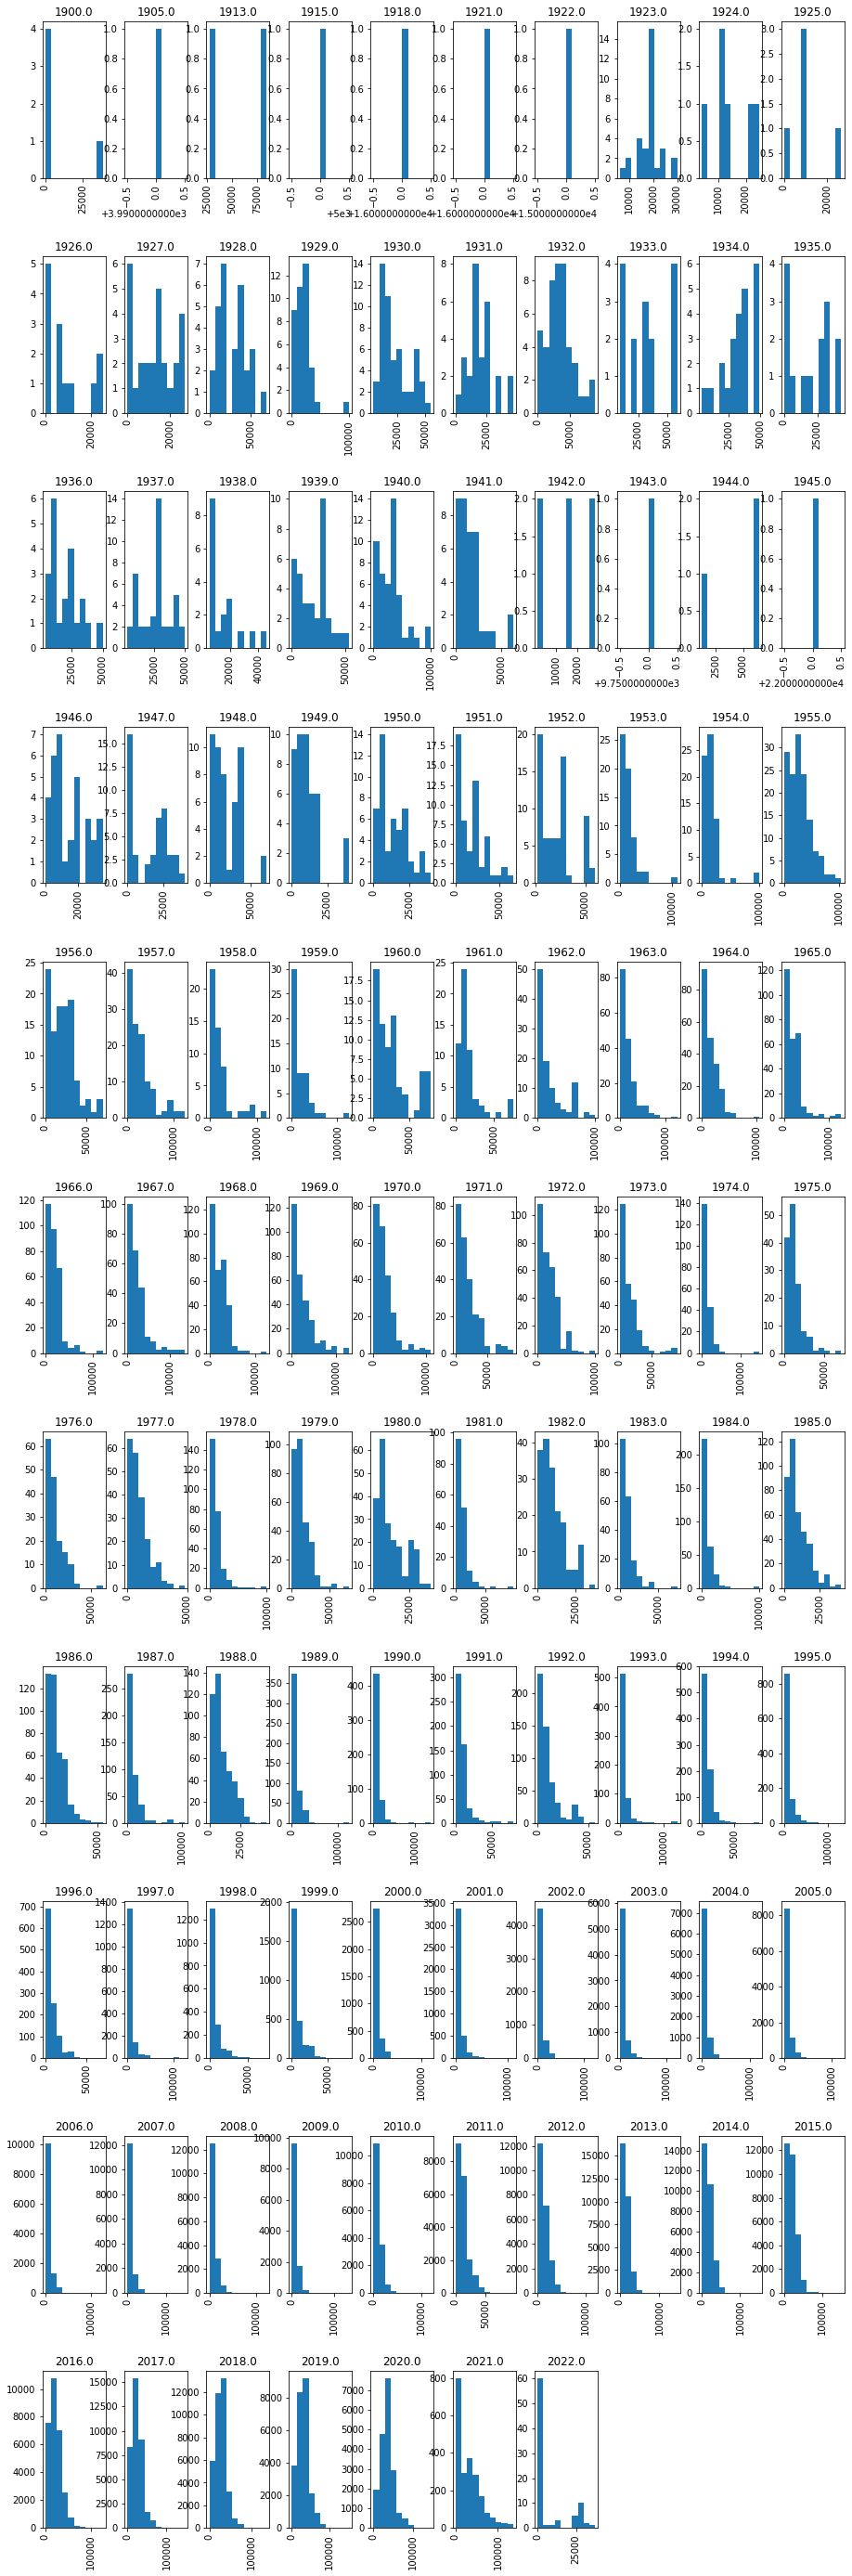

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,50))
df_s1.hist('price','year',ax=ax,grid=1)
plt.xlabel('Count')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
negativ = df_s1[(df_s1['price'] <= 0)].index
df_s1.drop( negativ, inplace=True)

In [ ]:
Häufigkeit = df_s1['model'].value_counts().index
Häufigkeit

df_s1.drop(Häufigkeit<2 , inplace=True)


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
#plt.bar(df_s1['region'],df_s1['price'])
#plt.xlabel('region')
#plt.ylabel('price')
#plt.xticks(rotation=90)
#plt.show()


KeyboardInterrupt: 